In [1]:
import sys, os
import numpy as np

sys.path.append("../")

# I. **Init simulation**
## Loading simulation context

In [2]:
from braidpy.simu import simu


sim = simu( max_iter = 1000,  
            stim = "monde",  
            langue = "fr",
            lexicon_name = "lexique3_red.csv",  
            conf_mat_name = "Simpson13Mod.xls",  
            ortho_char_name = "alphabet_lat.csv",
            phono_char_name = "xsampa_fr.csv",
            enable_phono = True, 
            store_phono = True, 
            store_ortho = True,
            model = None,  
            use_pkl = False,  
            save_pkl = False,
            build_prototype = False
            )
model = sim.model

## Specifying Model Parameters

In [3]:
# Parameters
stimulus = "monde"
model.gazePosition = (len(stimulus)+1)/2 
model.meanA = (len(stimulus)+1)/2
model.sdA = 1.75
model.Qa = 1
model.top_down_influence = True
# model.version = 7

## Specifying probability distributions to be saved

In [4]:
sim.store={"percept":True, "word":True, "ld":True, "TDI":True}

# II. **Run Simulation**

In [5]:
sim.run_simu_normal()

SIMU:root:Stimulus: monde
SIMU:root:simulation duration: 1000
SIMU:root:ld ortho: 0.9941
SIMU:root:percept ortho: monde [0.829, 0.836, 0.875, 0.875, 0.876]
SIMU:root:word ortho:  monde, /m&d/, wmax = 0.9993 
SIMU:root:ld phono: 0.5
SIMU:root:percept phono: m&d [0.452, 0.795, 0.879, 0.862, 0.713, 0.22]
SIMU:root:word phono:  monde, /m&d/, wmax = 0.9993 
SIMU:root:generated phonological form: /m&d###/
SIMU:root:fixation position(s): [3.0]
SIMU:root:fixation VA dispersion(s): [1.75]


# III. **Numerical comparison**  (*asserts*)
1. *confusion_matrix*

In [6]:
assert np.array_equal(np.array(sim.model.ortho.conf_mat), np.load("struct/monde_conf_mat_TD.npy"))

2. *input_trace*

In [7]:
assert np.array_equal(sim.model.ortho.build_trace(), np.load("struct/monde_input_mat_TD.npy"))

3. *interference_matrix*

In [8]:
assert np.array_equal(sim.model.ortho.interference_mat, np.load("struct/monde_interference_mat_TD.npy"))

4. *Orth_percept distribution*

Due to some computation implementation differences, results obtained in the older and this version are not strictly equal.

However, we make sure the difference in computation is very small (1e-5 of relative tolerance and 1e-8 of absolute diffence).
Note that the computer epsilon is equal 1e-16.

To do so, we use the numpy function `allclose()` with its default parameters (instead of `array_equal()` that was used the past comparisons).

In [9]:
assert np.allclose(sim.res["ortho"]["percept"]["monde"], np.load("struct/monde_data_percept_TD.npy")) 

5. *Orth_lexical distribution*

In [10]:
assert np.allclose(sim.res["ortho"]["word"]["monde"][:,0], np.load("struct/monde_data_word_TD.npy")[:,0])

6. *Phon_percept distribution*

In [11]:
assert np.allclose(sim.res["phono"]["percept"]["monde"][:,0], np.load("struct/monde_data_phon_TD.npy")[:,0])

4. *Orth_LD distribution*

In [12]:
assert np.allclose(sim.res["ortho"]['ld']["monde"][:,0], np.load("struct/monde_ld_TD.npy")[:,0])

# IV. **Graphical comparison**

In [13]:
import matplotlib.pyplot as plt
import braidpy.braid_plot as brplt

## 1. **Letter curves comparison**

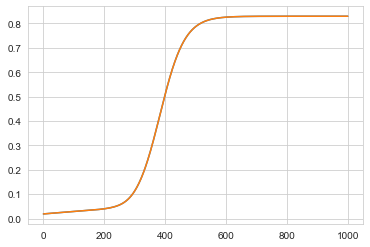

In [14]:
plt.plot(np.arange(1001), np.load("struct/monde_data_percept_TD.npy")[0,26,:].T)
plt.plot(np.arange(1001), sim.res["ortho"]["percept"]["monde"][0,26,:].T)

## 2. **Phoneme curves comparison**

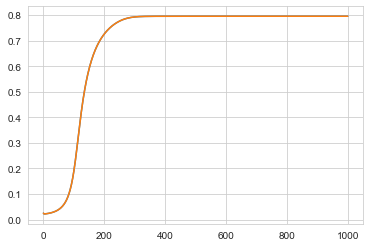

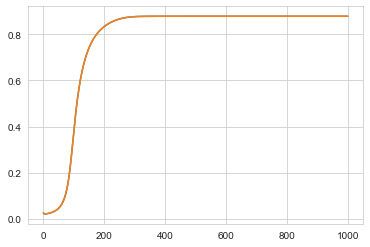

In [15]:
plt.plot(np.arange(1001), np.load("struct/monde_data_phon_TD.npy")[0,12,:].T);
plt.plot(np.arange(1001), sim.res["phono"]["percept"]["monde"][0,12,:].T)

plt.figure()
plt.plot(np.arange(1001), np.load("struct/monde_data_phon_TD.npy")[1,37,:].T);
plt.plot(np.arange(1001), sim.res["phono"]["percept"]["monde"][1,37,:].T)

plt.figure()
plt.plot(np.arange(1001), np.load("struct/monde_data_phon_TD.npy")[2,3,:].T);
plt.plot(np.arange(1001), sim.res["phono"]["percept"]["monde"][2,3,:].T)

## 3. **Word probability curves comparison**

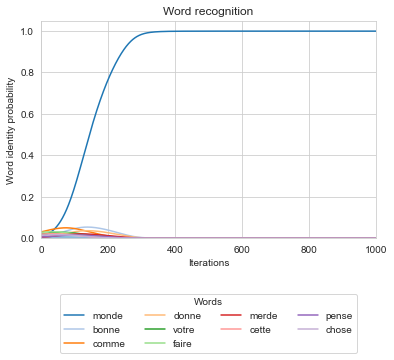

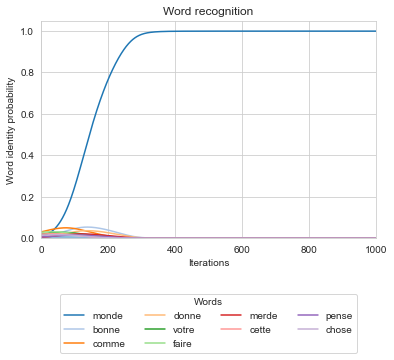

In [16]:
df = brplt.plot_word_distribution_evo(sim.model, sim.res["ortho"]["word"]["monde"], item_to_show = 10);
plt.figure()
df = brplt.plot_word_distribution_evo(sim.model, np.load("struct/monde_data_word_TD.npy"), item_to_show = 10);